In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from astropy.time import Time

import subprocess

# Larger figure size
fig_size = [10, 6]
plt.rcParams['figure.figsize'] = fig_size

In [3]:
mjd_unixtimestamp_offset = 10587.5
seconds_in_day = 3600 * 24

def mjd2unixtimestamp(m):
    return (m - mjd_unixtimestamp_offset) * seconds_in_day

def unixtimestamp2mjd(u):
    return u / seconds_in_day + mjd_unixtimestamp_offset

In [4]:
def load_orbit_file(path):
    ncols = 8
    data = np.fromfile(path, sep=' ')
    return data.reshape((data.size // ncols, ncols))

Keys for each of the columns in the orbit (Keplerian state) report.

In [5]:
utc = 0
sma = 1
ecc = 2
inc = 3
raan = 4
aop = 5
ma = 6
ta = 7

Plot the orbital parameters which are vary significantly between different tracking files.

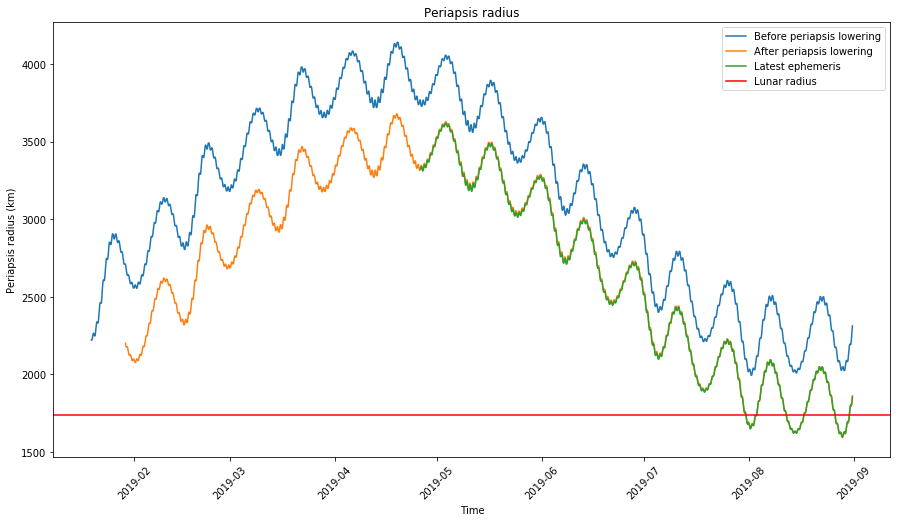

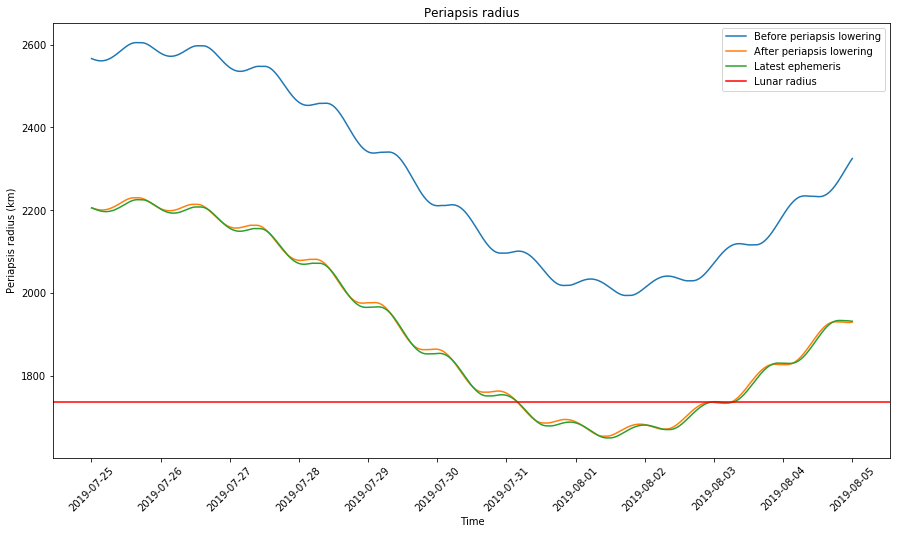

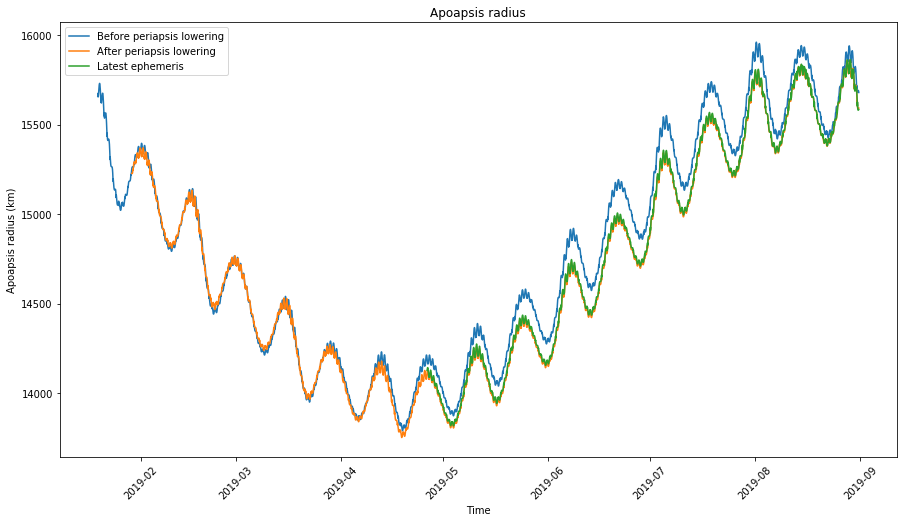

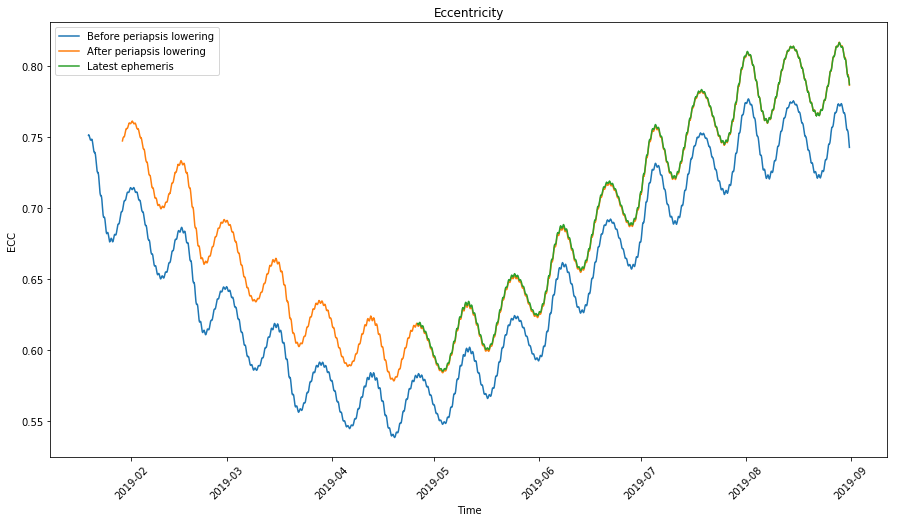

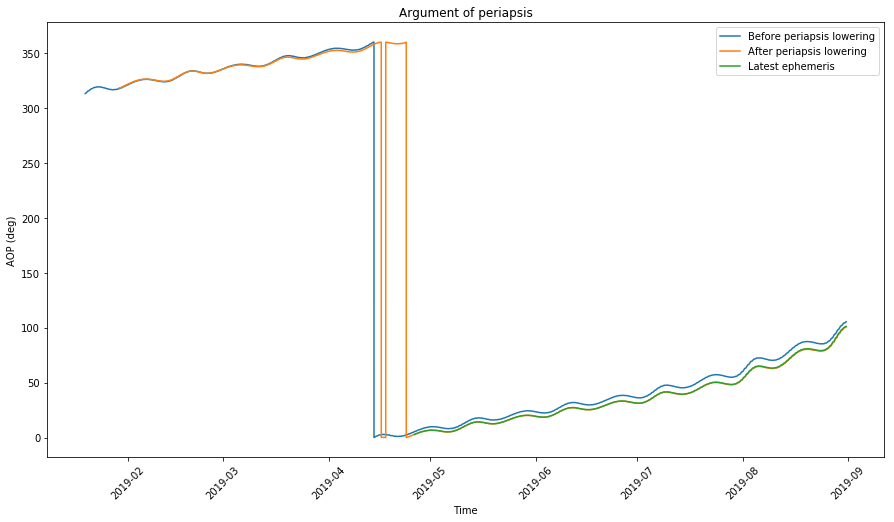

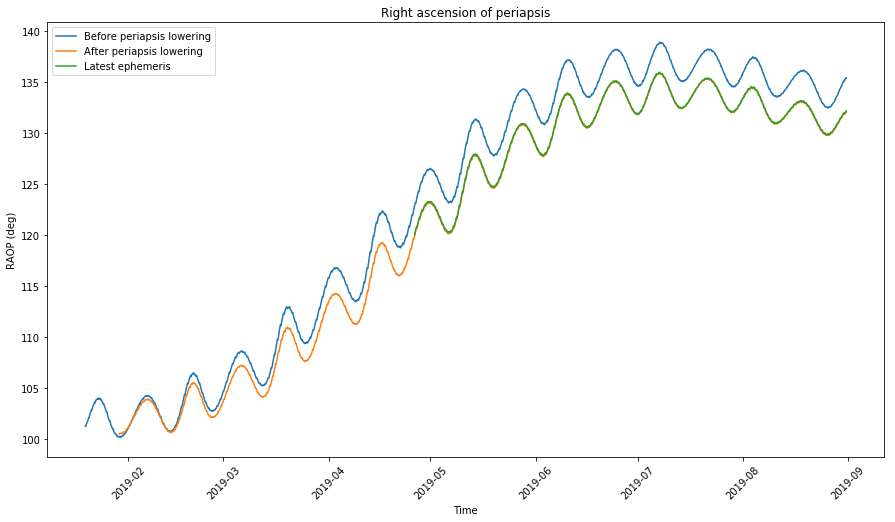

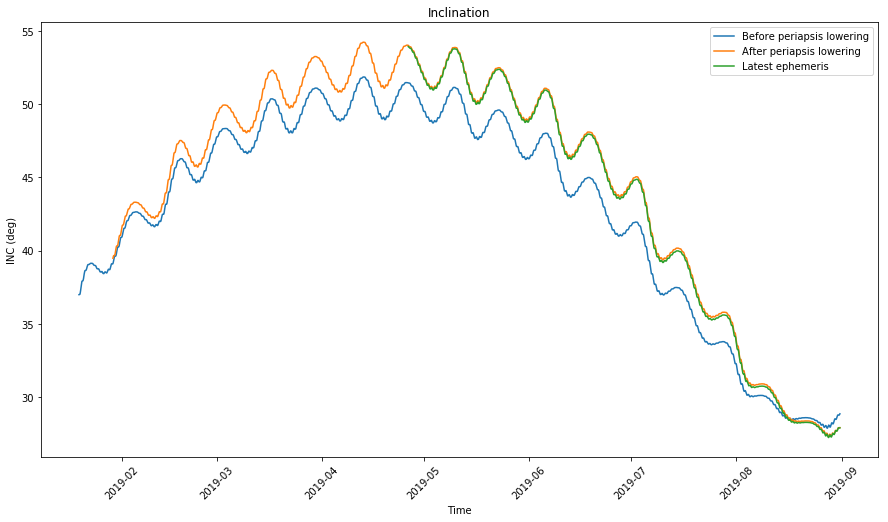

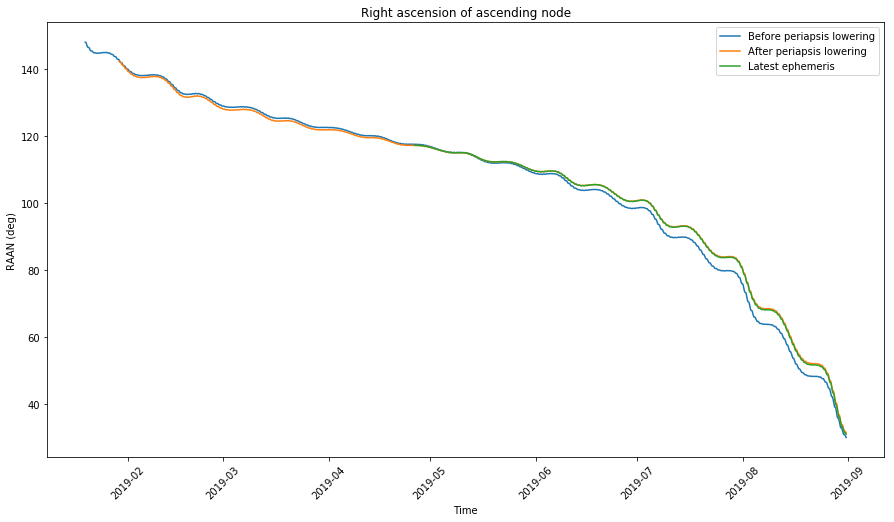

In [15]:
#fig1 = plt.figure(figsize = [15,8], facecolor='w')
fig_peri = plt.figure(figsize = [15,8], facecolor='w')
fig_peri_deorbit = plt.figure(figsize = [15,8], facecolor='w')
fig_apo = plt.figure(figsize = [15,8], facecolor='w')
fig3 = plt.figure(figsize = [15,8], facecolor='w')
fig4 = plt.figure(figsize = [15,8], facecolor='w')
fig4_rap = plt.figure(figsize = [15,8], facecolor='w')
fig5 = plt.figure(figsize = [15,8], facecolor='w')
fig6 = plt.figure(figsize = [15,8], facecolor='w')
#sub1 = fig1.add_subplot(111)
sub_peri = fig_peri.add_subplot(111)
sub_peri_deorbit = fig_peri_deorbit.add_subplot(111)
sub_apo = fig_apo.add_subplot(111)
sub3 = fig3.add_subplot(111)
sub4 = fig4.add_subplot(111)
sub4_rap = fig4_rap.add_subplot(111)
sub5 = fig5.add_subplot(111)
sub6 = fig6.add_subplot(111)

subs = [sub_peri, sub_peri_deorbit, sub_apo, sub3, sub4, sub4_rap, sub5, sub6]

for file in ['orbit_deorbit.txt', 'orbit_deorbit2.txt', 'orbit_deorbit3.txt']:
    orbit = load_orbit_file(file)

    t = Time(mjd2unixtimestamp(orbit[:,utc]), format='unix')

    #sub1.plot(t.datetime, orbit[:,sma])
    sub_peri.plot(t.datetime, orbit[:,sma]*(1-orbit[:,ecc]))
    
    deorbit_sel = (mjd2unixtimestamp(orbit[:,utc]) >= 1564012800) & (mjd2unixtimestamp(orbit[:,utc]) <= 1564963200)
    if np.any(deorbit_sel):
        sub_peri_deorbit.plot(t[deorbit_sel].datetime, orbit[deorbit_sel,sma]*(1-orbit[deorbit_sel,ecc]))
    
    sub_apo.plot(t.datetime, orbit[:,sma]*(1+orbit[:,ecc]))
    sub3.plot(t.datetime, orbit[:,ecc])
    sub4.plot(t.datetime, orbit[:,aop])
    sub4_rap.plot(t.datetime, np.fmod(orbit[:,aop] + orbit[:,raan],360))
    sub5.plot(t.datetime, orbit[:,inc])
    sub6.plot(t.datetime, orbit[:,raan])

sub_peri.axhline(y = 1737, color='red')
sub_peri_deorbit.axhline(y = 1737, color='red')

month_locator = mdates.MonthLocator()
day_locator = mdates.DayLocator()

for sub in subs:
    sub.set_xlabel('Time')
    sub.xaxis.set_major_locator(month_locator)
    sub.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    sub.xaxis.set_tick_params(rotation=45)
sub_peri_deorbit.xaxis.set_major_locator(day_locator)
sub_peri_deorbit.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

#sub1.set_ylabel('SMA (km)')
sub_peri.set_ylabel('Periapsis radius (km)')
sub_peri_deorbit.set_ylabel('Periapsis radius (km)')
sub_apo.set_ylabel('Apoapsis radius (km)')
sub3.set_ylabel('ECC')
sub4.set_ylabel('AOP (deg)')
sub4_rap.set_ylabel('RAOP (deg)')
sub5.set_ylabel('INC (deg)')
sub6.set_ylabel('RAAN (deg)')

#sub1.set_title('Semi-major axis')
sub_peri.set_title('Periapsis radius')
sub_peri_deorbit.set_title('Periapsis radius')
sub_apo.set_title('Apoapsis radius')
sub3.set_title('Eccentricity')
sub4.set_title('Argument of periapsis')
sub4_rap.set_title('Right ascension of periapsis')
sub5.set_title('Inclination')
sub6.set_title('Right ascension of ascending node')

for sub in subs:
    sub.legend(['Before periapsis lowering', 'After periapsis lowering', 'Latest ephemeris'])
    
sub_peri.legend(['Before periapsis lowering', 'After periapsis lowering', 'Latest ephemeris', 'Lunar radius']);
sub_peri_deorbit.legend(['Before periapsis lowering', 'After periapsis lowering', 'Latest ephemeris', 'Lunar radius']);